In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from config import config
import data_helpers

from datetime import datetime, timedelta

In [2]:
df = data_helpers.read_large_excel(config['data'], "contest_total_data")
df = data_helpers.read_large_excel(config['data'], "contest_total_data")

In [3]:
filename = 'ids-0.01-15.0-0.9-0.8-10-0.000005-26.64-32601-15'
(a_conductance_search, b_conductance_search, conductance365, 
        conductanceMedTeam, ids_max, minConductanceStep, hours, nDataPoints, maxLen) \
= data_helpers.filename_to_dataParams(filename)
path = os.path.join('./data', filename + '.json')
fixture_id_to_ids = data_helpers.LoadJsonData(path)

Text(0.5, 1.0, 'Max length of ids: 15')

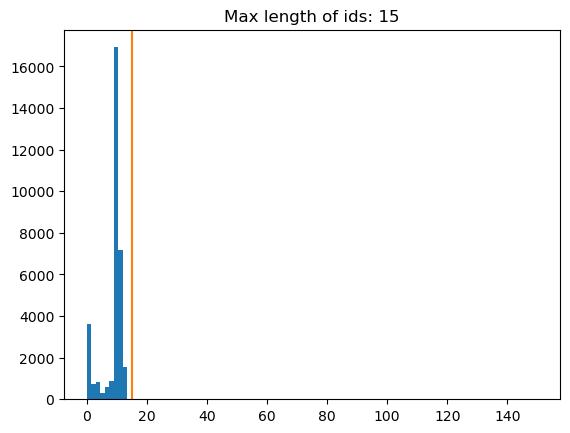

In [4]:
lengths = [len(ids) for ids in fixture_id_to_ids.values()]
plt.hist(lengths, np.linspace(0, 150, 101))
plt.ylim(plt.ylim())
maxLen = max(lengths)
plt.plot([maxLen, maxLen], plt.ylim())
plt.title(f'Max length of ids: {maxLen}')

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def getPair(df, baseId):
    frame = df.loc[df['fixture_id'] == baseId, ['teams_home_team_id', 'teams_away_team_id']]
    pairs = list(zip(list(frame['teams_home_team_id']), list(frame['teams_away_team_id'])))
    return pairs[0]

def showGraph(n):
    if(len(list(fixture_id_to_ids.items())) > n):
        (baseId, ids) = list(fixture_id_to_ids.items())[n]
        print('base pair: ', baseId, getPair(df, int(baseId)), ids)     # No int(.), no work.
        
        if baseId in ids:
            raise("BaseId in ids")

        edges = []
        for id in ids:
            edges.append(getPair(df, id))
        print('baseId, nGames, pairs: ', baseId, len(ids), edges)

        G = nx.Graph()
        G.add_edges_from(edges)

        subax1 = plt.subplot(111)
        nx.draw(G, with_labels=True)
        # print('G.nodes: ', G.nodes)
        print('G.edges: ', G.edges)

In [6]:
idx = 25002

base pair:  312800 (270, 2121) [312792, 112682, 125398, 112675, 235057, 125385, 112666, 112660, 232118, 232117]
baseId, nGames, pairs:  312800 10 [(270, 829), (271, 270), (2121, 2118), (270, 268), (278, 270), (2124, 2121), (270, 276), (271, 278), (278, 276), (270, 271)]
G.edges:  [(270, 829), (270, 271), (270, 268), (270, 278), (270, 276), (271, 278), (2121, 2118), (2121, 2124), (278, 276)]
25012


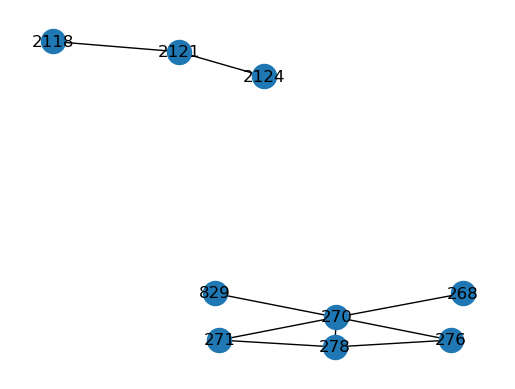

In [7]:
showGraph(idx)
idx += 10
print(idx)